## Random Forest Classifier Examples

This example shows how to develop a random forest classifier for Spam messages.  
 
- Using a dataset from the UCI machine learning repository. Details can be found here [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "https://raw.githubusercontent.com/Graeme-kemp/Classifiers/main/SMSSpamCollection.csv"
df = pd.read_csv(file, encoding="latin-1", sep='\t', header = None)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 1) A

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
np.random.seed(42)
X_tr, X_te, y_tr, y_te = train_test_split(df['message'], df['label'], test_size=0.2)
vectorizer = CountVectorizer()

In [4]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(vectorizer.fit_transform(X_tr), y_tr)
y_pred = rf.predict(vectorizer.transform(X_te))
print(f"Testing error: {np.mean(y_pred != y_te):.2f}")

Testing error: 0.02


In [5]:
feat_df=pd.DataFrame(zip(list(vectorizer.get_feature_names()), rf.feature_importances_))
sorted_features = feat_df.sort_values(by=[1], ascending = False)
sorted_features.head(5)

,0,1
1611,call,0.027409
7076,txt,0.023876
4535,mobile,0.018627
7628,www,0.015829
1823,claim,0.015041


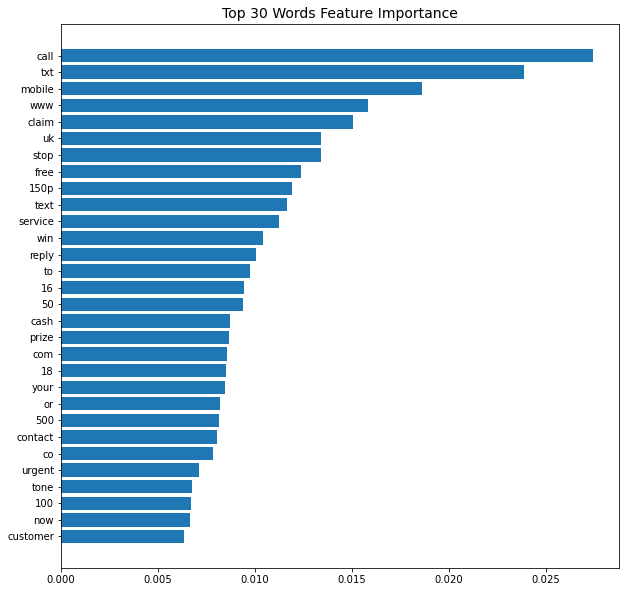

In [6]:
top30text = sorted_features.iloc[0:30,:]
top30text = top30text.sort_values(by=[1], ascending = True)

plt.figure(figsize=(10, 10))
plt.title("Top 30 Words Feature Importance", fontsize=14)
plt.barh(top30text[0], top30text[1])
plt.show()

The above graph shows the top 30 individual words that contribute to the random forest classifier. In this dataset, the word 'call' is the most useful word that allows the random forest classifier to determine whether an email is spam.  

### 1) Random Forest - Individual character classifier

In [7]:
np.random.seed(42)
X_tr, X_te, y_tr, y_te = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer(analyzer="char")
rf = RandomForestClassifier(n_estimators=100)
rf.fit(vectorizer.fit_transform(X_tr), y_tr)
y_pred = rf.predict(vectorizer.transform(X_te))
print(f"Testing error: {np.mean(y_pred != y_te):.2f}")

Testing error: 0.02


In [8]:
feat_df=pd.DataFrame(zip(list(vectorizer.get_feature_names()), rf.feature_importances_))
sorted_features = feat_df.sort_values(by=[1], ascending = False)
sorted_features.head(5)

,0,1
16,0,0.193848
24,8,0.103336
17,1,0.083470
21,5,0.079123
23,7,0.058483


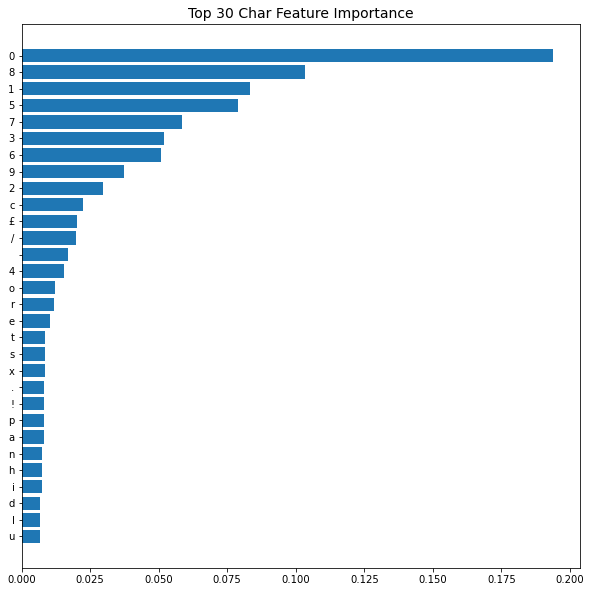

In [9]:
top30char = sorted_features.iloc[0:30,:]
top30char = top30char.sort_values(by=[1], ascending = True)

plt.figure(figsize=(10, 10))
plt.title("Top 30 Char Feature Importance", fontsize=14)
plt.barh(top30char[0], top30char[1])
plt.show()

The 'char' vectorized classifier that was built using the Random Forest method is compatible with the results seen with a bayes Classifier on the same dataset. the number of digits was the strongest signal/predictor for determining the Spam/Ham classification. You see this in the 'char' vectorizer feature improtance graph as digits were among the most important predictors and contributed the most in the classification.   

### 2) MultinomialNB Classifier for Movie Reviews

In [10]:
#Movie Review data from IMBD
url = "https://raw.githubusercontent.com/mgreenbe/imdb/main/reviews.csv"
df = pd.read_csv(url, encoding="latin-1")
df.head(5)


,review,positive
0,The Adventures of Sebastian Cole is about a bo...,0
1,if they gave me the option of negative numbers...,0
2,"The only thing in ""Sudden Death"" that outdoes ...",0
3,"Apparently none of the previous reviewers,most...",0
4,Looking at these reviews and seeing all these ...,0


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = df.review
y = df.positive
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=45000, random_state=42)

In [12]:

v = CountVectorizer()
v.fit(X_tr)
mnb = MultinomialNB()
mnb.fit(v.transform(X_tr), y_tr)
y_pr = mnb.predict(v.transform(X_te))
y_test_pred = mnb.predict(v.transform(X_tr))
train_err = np.mean(y_test_pred != y_tr)
test_err = np.mean(y_pr != y_te)
print(f"training error = {train_err:.2f}")
print(f"testing error = {test_err:.2f}")


training error = 0.06
testing error = 0.17


### 2) Random Forest Classifier for Movie Reviews

In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(v.fit_transform(X_tr), y_tr)
y_pred = rf.predict(v.transform(X_te))
y_test_pred = rf.predict(v.transform(X_tr))

train_err = np.mean(y_test_pred != y_tr)
test_err = np.mean(y_pred != y_te)

print(f"training error = {train_err:.2f}")
print(f"testing error = {test_err:.2f}")

training error = 0.00
testing error = 0.02


In [14]:
#data wrangling to get list of top 30 feature importances from Random Forest Model
feat_df=pd.DataFrame(zip(list(v.get_feature_names()), rf.feature_importances_))
sorted_features = feat_df.sort_values(by=[1], ascending = False)
top30text = sorted_features.iloc[0:30,:]
top30text = top30text.sort_values(by=[1], ascending = True)
display(top30text)

,0,1
18390,it,0.002320
20779,loved,0.002324
12064,even,0.002329
34927,that,0.002426
17441,in,0.002429
16706,horrible,0.002440
20774,love,0.002446
18932,just,0.002465
38673,wonderful,0.002513
3614,best,0.002515


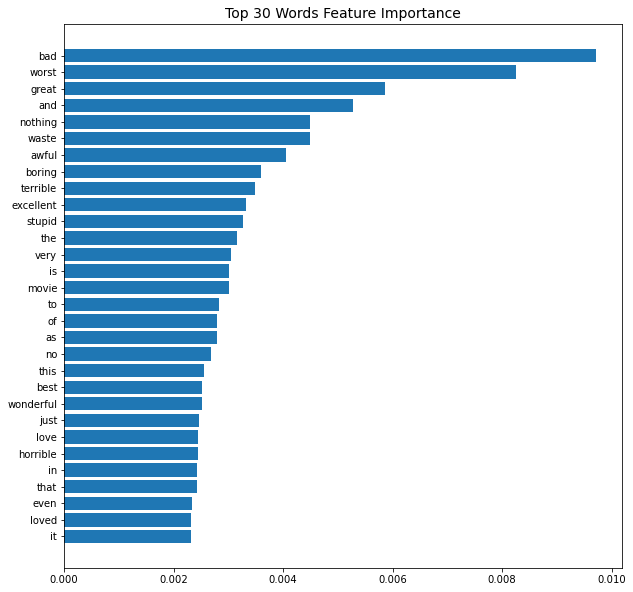

In [15]:
plt.figure(figsize=(10, 10))
plt.title("Top 30 Words Feature Importance", fontsize=14)
plt.barh(top30text[0], top30text[1])
plt.show()

In [16]:
#Getting frequency count for positve and negative reviews
X_pos = X_tr[y_tr == 1]
X_neg = X_tr[y_tr == 0]
print(len(X_pos), len(X_neg))

2521 2479


In [17]:
Pos_freq_df=pd.DataFrame(zip(list(v.get_feature_names()),v.fit_transform(X_pos).toarray().sum(axis=0)))
Neg_freq_df=pd.DataFrame(zip(list(v.get_feature_names()),v.fit_transform(X_neg).toarray().sum(axis=0)))
Pos_freq_df = Pos_freq_df.sort_values(by=[1], ascending = False)
Neg_freq_df = Neg_freq_df.sort_values(by=[1], ascending = False)
display(Pos_freq_df)

,0,1
25683,peppy,33930
1191,ajeeb,17568
17870,inquiry,14858
26012,piano,13275
13532,fondness,11219
...,...,...
13622,forever,1
13623,forewarned,1
13630,forgetful,1
13634,forging,1


In [18]:
Pos_reduced_freq_df = pd.concat([top30text, Pos_freq_df], join = 'inner', axis = 1)
Pos_reduced_freq_df.columns = ['word', 'FeatureImportance', 'wordr', 'Frequency']
Pos_reduced_freq_df = Pos_reduced_freq_df.drop(columns = ['wordr'])

Neg_reduced_freq_df = pd.concat([top30text, Neg_freq_df], join = 'inner', axis = 1)
Neg_reduced_freq_df.columns = ['word', 'FeatureImportance', 'wordr', 'Frequency']
Neg_reduced_freq_df = Neg_reduced_freq_df.drop(columns = ['wordr'])

In [19]:
display(Pos_reduced_freq_df)

,word,FeatureImportance,Frequency
18390,it,0.002320,1
20779,loved,0.002324,1
12064,even,0.002329,1
17441,in,0.002429,1
16706,horrible,0.002440,2
20774,love,0.002446,1
18932,just,0.002465,44
3614,best,0.002515,1
23908,no,0.002676,2
2256,as,0.002785,3


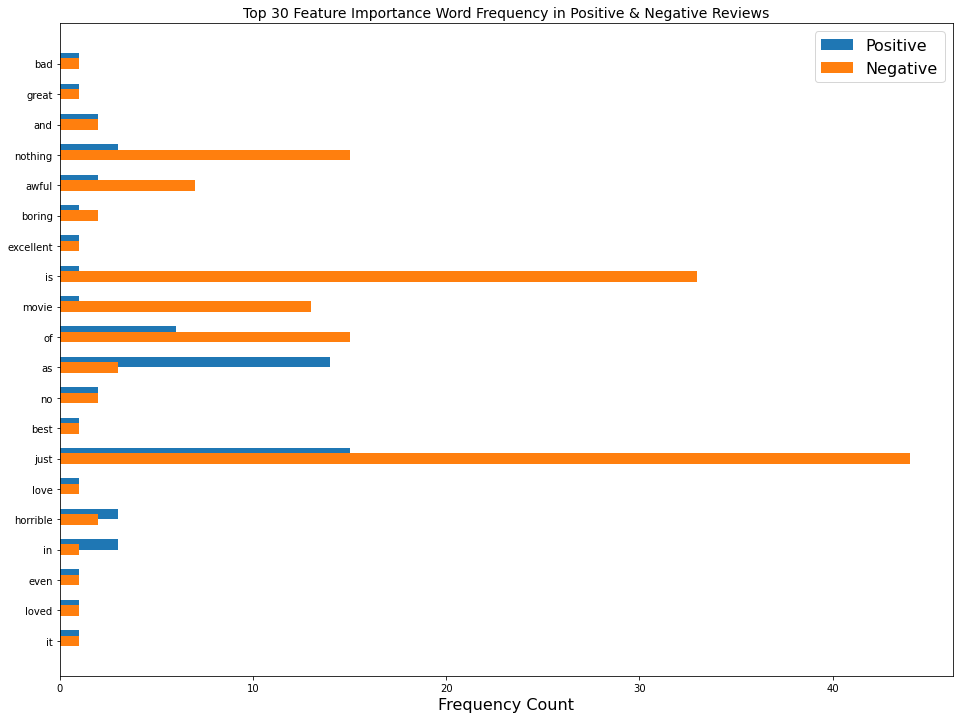

In [20]:
plt.figure(figsize=(16, 12))
ind = np.arange(30)
height = 0.35
plt.title("Top 30 Feature Importance Word Frequency in Positive & Negative Reviews", fontsize=14)
plt.barh(Neg_reduced_freq_df.word, Neg_reduced_freq_df.Frequency, height = height, align = 'edge')
plt.barh(Pos_reduced_freq_df.word, Pos_reduced_freq_df.Frequency, height = height, align = 'center')
plt.xlabel('Frequency Count', fontsize = 16)
plt.legend(['Positive', 'Negative'], fontsize = 16)
plt.show()

The Negative and postive word plot for the top 30 words in terms of feature importance in the random forest classifier mostly confirms what we would expect. In this plot, the words 'boring' and 'awful' are negative words and appear more frequently in negative reviews compared to postive reviews. There are no clearly positive words that appear to be occuring significantly more in positive reviews compared to negative reviews as the word 'great' appears equally in both type of messages. This is largely due to the small subset (5000/50000) as completing this plot with the entire predictor training set shows that negative words tend to be better predictors and netural words like 'of' or 'as' appear in about the same frequency in positive and negative reviews. 

## Tuning Classifiers - grid_param 

In [30]:
#Random Forest Classifier for Part 1
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
url = "https://raw.githubusercontent.com/Graeme-kemp/Classifiers/main/imbd-reviews.csv"
df = pd.read_csv(url, encoding="latin-1")
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

X = df.message
y = df.label
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)



HTTPError: HTTP Error 404: Not Found

In [22]:
#binary, stop_words, and max_features in CountVectorizer and n_estimators, max_depth and max_features

grid_param = {
    'n_estimators': [10, 20, 40, 60, 80, 100],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': [10, 20, 30, 50, 100, 150],
}



In [23]:
rf = RandomForestClassifier()
v = CountVectorizer()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid_param, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [24]:
search = rf_random.fit(v.fit_transform(X_tr), y_tr)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.1s finished


In [25]:
search.best_params_

{'n_estimators': 60, 'max_features': 150, 'max_depth': 30}

In [26]:
y_pred = rf_random.predict(v.transform(X_te))
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [27]:
test_err = np.mean(y_pred != y_te)
print(f"testing error = {test_err:.2f}")

testing error = 0.03


In [28]:
rf = RandomForestClassifier(n_estimators = 60, max_features= 150, max_depth= 30)
rf_fit = rf.fit(v.fit_transform(X_tr), y_tr)
y_pred = rf_fit.predict(v.transform(X_te))
test_err = np.mean(y_pred != y_te)
print(f"testing error = {test_err:.2f}")

testing error = 0.03
